<font color = 'red'>
<b>Sales Analysis Project </b> 
</font>

<b> Project statement: </b>

AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. <br>
It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country. <br>
<br>
The brand caters to all age groups, from kids to the elderly.<br>
<br>
Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. <br>
To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. 
<br>
The specific tasks include:
1)    Identify the states that are generating the highest revenues.<br>
2)    Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
<br>
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis.<br> 


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the dataset into the dataframe - df
df = pd.read_csv(r"C:\Users\USER\IITKML\AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [7]:
df.shape

(7560, 6)

In [8]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 7560 rows and 6 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


<font color = 'Green'> 
Observation: <br>
Columns Time, State & Group are type 'object' whereas they should of type 'string' <br>
Column Date is of type 'object' where as it should be of type 'datetime' </font>

In [11]:
# Convert the columns to string dtype
df['Time'] = df['Time'].astype('string')
df['State'] = df['State'].astype('string')
df['Group'] = df['Group'].astype('string')

In [12]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   string        
 2   State   7560 non-null   string        
 3   Group   7560 non-null   string        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), string(3)
memory usage: 354.5 KB


<font color = 'green'>All columns have been corrected with the required dtypes </font>

In [14]:
# Check for duplicates...
df[ df.duplicated() ]

,Date,Time,State,Group,Unit,Sales


In [15]:
df.duplicated().sum()

0

<font color = 'green'> There are no duplicate rows in the dataset </font>

In [16]:
# Check for invalid values in the columns

df.Time.unique()

<StringArray>
[' Morning', ' Afternoon', ' Evening']
Length: 3, dtype: string

In [17]:
df.State.unique()

<StringArray>
[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Length: 7, dtype: string

In [18]:
df.Group.unique()

<StringArray>
[' Kids', ' Men', ' Women', ' Seniors']
Length: 4, dtype: string

In [19]:
# Lets correct the Time column by removing the leading space
df['Time'] = df['Time'].str.strip()
df.Time.unique()

<StringArray>
['Morning', 'Afternoon', 'Evening']
Length: 3, dtype: string

In [20]:
# Lets correct the Group column by removing the leading space
df['Group'] = np.where(df['Group'] == ' Kids', 'Kids', df['Group'])
df['Group'] = np.where(df['Group'] == ' Men', 'Men', df['Group'])
df['Group'] = np.where(df['Group'] == ' Women', 'Women', df['Group'])
df['Group'] = np.where(df['Group'] == ' Seniors', 'Seniors', df['Group'])
df['Group'].unique()

array(['Kids', 'Men', 'Women', 'Seniors'], dtype=object)

In [21]:
# Lets correct the State column by removing the leading space
df['State'] = df['State'].str.strip()
df.State.unique()

<StringArray>
['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS']
Length: 7, dtype: string

In [25]:
# dtype of Group changed to object as we used np.where fn.
# converting it back to string
df['Group'] = df['Group'].astype('string')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   string        
 2   State   7560 non-null   string        
 3   Group   7560 non-null   string        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), string(3)
memory usage: 354.5 KB


In [34]:
# Find the min and max values of the Unit and Sales column and print them
print('Minimum value in Unit is : ' , df.Unit.min())
print('Maximum value in Unit is : ' , df.Unit.max())
print()
print('Minimum value in Sales is : ' , df.Sales.min())
print('Maximum value in Sales is : ' , df.Sales.max())

Minimum value in Unit is :  2
Maximum value in Unit is :  65

Minimum value in Sales is :  5000
Maximum value in Sales is :  162500


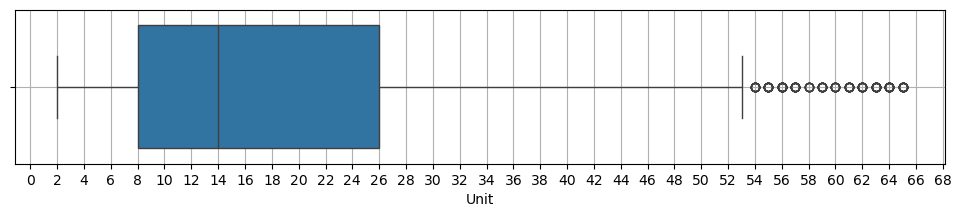

In [42]:
# Outlier Detection : View and Detect outliers in column 'Unit'
plt.figure(figsize=(12,2))
sns.boxplot(x = 'Unit', data = df)
plt.xticks(range(0,70,2))
plt.grid()
plt.show()


In [43]:
Q1 = df['Unit'].describe().loc['25%']
Q3 = df['Unit'].describe().loc['75%']
print(Q1, Q3)

8.0 26.0


In [44]:
Q1 = df.Unit.quantile(0.25)
Q3 = df.Unit.quantile(0.75)
print(Q1, Q3)

8.0 26.0


In [45]:
IQR = Q3 - Q1
IQR

18.0

In [46]:
lwrRange = Q1 - (1.5 * IQR)
uprRange = Q3 + (1.5 * IQR)
print(lwrRange, uprRange)

-19.0 53.0


In [47]:
df_unit = df[ (df.Unit < lwrRange) | (df.Unit > uprRange) ]
df_unit

,Date,Time,State,Group,Unit,Sales,Unit_Outlier
5082,2020-12-01,Afternoon,VIC,Women,63,157500,Outlier
5083,2020-12-01,Afternoon,VIC,Seniors,62,155000,Outlier
5161,2020-12-02,Morning,VIC,Men,56,140000,Outlier
5162,2020-12-02,Morning,VIC,Women,59,147500,Outlier
5169,2020-12-02,Evening,VIC,Men,64,160000,Outlier
...,...,...,...,...,...,...,...
7432,2020-12-29,Afternoon,VIC,Kids,65,162500,Outlier
7433,2020-12-29,Afternoon,VIC,Men,54,135000,Outlier
7437,2020-12-29,Evening,VIC,Men,54,135000,Outlier
7515,2020-12-30,Morning,VIC,Seniors,65,162500,Outlier


In [48]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [ ]:
# Impute the unit column with mean values
unit_mean = df.describe().Unit['mean']
unit_mean = np.round(unit_mean, 1)
unit_mean

18.0

In [50]:
# reading thru outliers dataframe and correcting the main dataframe
for row in df_unit.itertuples():
    df.at[row.Index, 'Unit'] = unit_mean

In [51]:
df_unit.loc[5082]

Date            2020-12-01 00:00:00
Time                      Afternoon
State                           VIC
Group                         Women
Unit                             63
Sales                        157500
Unit_Outlier                Outlier
Name: 5082, dtype: object

In [52]:
df.loc[5082]

Date            2020-12-01 00:00:00
Time                      Afternoon
State                           VIC
Group                         Women
Unit                             18
Sales                        157500
Unit_Outlier                Outlier
Name: 5082, dtype: object

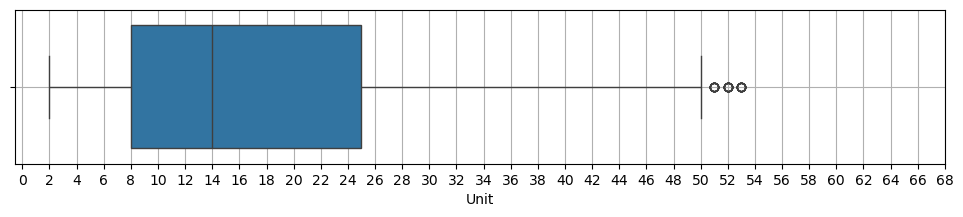

In [53]:
plt.figure(figsize=(12,2))
sns.boxplot(x = 'Unit', data = df)
plt.xticks(range(0,70,2))
plt.grid()
plt.show()

In [56]:
# Find the Group that is making min and max sales
group_sales = df.groupby('Group')['Sales'].sum()
group_sales


Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64

In [ ]:
min_group = group_sales.idxmin()
max_group = group_sales.idxmax()
print(f"Group with Minimum Sales: {min_group} ({group_sales[min_group]})")
print(f"Group with Maximum Sales: {max_group} ({group_sales[max_group]})")

Group with Minimum Sales: Seniors (84037500)
Group with Maximum Sales: Men (85750000)


In [ ]:
# Find the State that is making min and max sales

state_sales = df.groupby('State')['Sales'].sum()
state_sales

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

Group with min sales:  WA - 22152500
Group with max sales:  VIC - 105565000


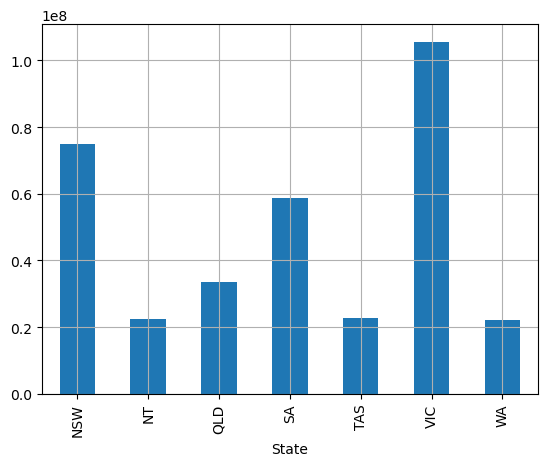

In [61]:

print('Group with min sales: ', state_sales.idxmin(), '-', state_sales.min())
print('Group with max sales: ', state_sales.idxmax(), '-', state_sales.max())

state_sales.plot(kind= 'bar')
plt.grid()
plt.show()

In [62]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['Weekday'] = df['Date'].dt.weekday
df.head()

,Date,Time,State,Group,Unit,Sales,Unit_Outlier,year,month,Weekday
0,2020-10-01,Morning,WA,Kids,8,20000,Normal,2020,10,3
1,2020-10-01,Morning,WA,Men,8,20000,Normal,2020,10,3
2,2020-10-01,Morning,WA,Women,4,10000,Normal,2020,10,3
3,2020-10-01,Morning,WA,Seniors,15,37500,Normal,2020,10,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,Normal,2020,10,3


In [63]:
month_sales = df.groupby('month').Sales.sum()
month_sales

month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

In [64]:
print('Month with max sales: ', month_sales.idxmax(), '-', month_sales.max())

Month with max sales:  12 - 135330000


In [ ]:
import plotly.express as px

In [ ]:
# Donut Chart per group sales

fig = px.pie(df, values = group_sales, names = group_sales.index,
            color_discrete_sequence=px.colors.sequential.Darkmint,
            hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+value+label')
fig.show()

In [ ]:
# Donut Chart per state sales
fig = px.pie(df, values = state_sales, names = state_sales.index,
            color_discrete_sequence=px.colors.sequential.Inferno_r,
            hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+value+label')
fig.show()

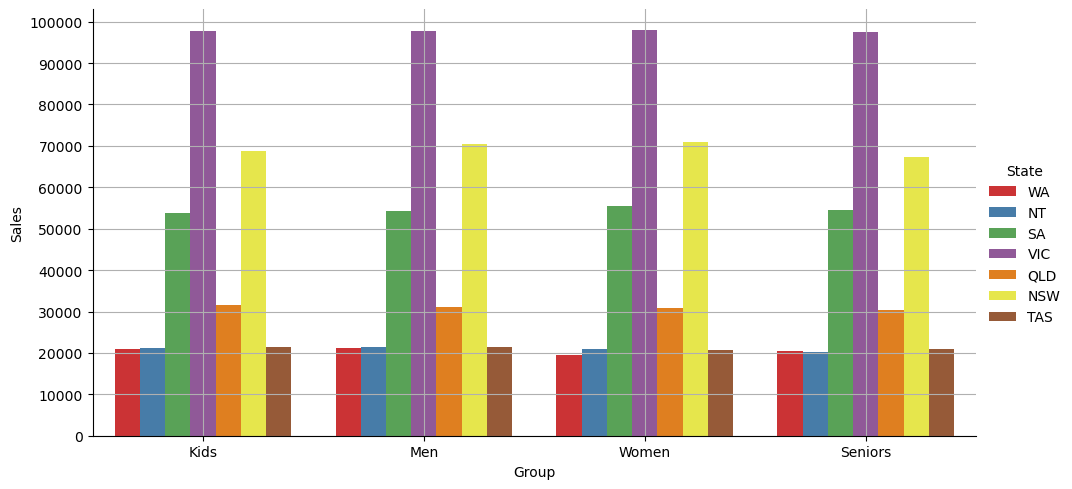

In [ ]:
# Bar Plot

sns.catplot(x = 'Group', y = 'Sales', data = df, kind = 'bar', hue = 'State',
           height = 5, aspect = 2, palette = 'Set1', ci = 0)
plt.yticks(np.arange(0, 110000, 10000))
plt.grid()
plt.show()

In [74]:
px.bar(df,
       x = 'State', 
       y = 'Sales', 
       color = 'State',
       title="Sales Statewise",
       text_auto = True)

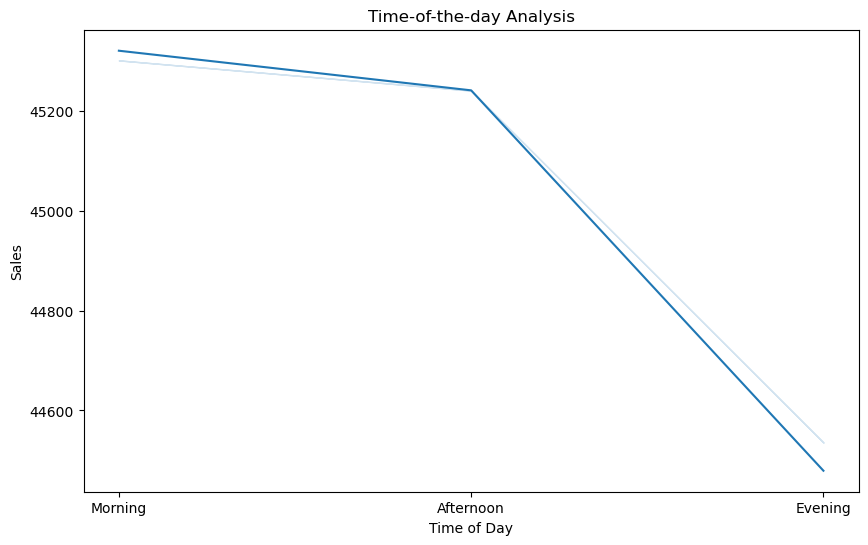

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=df, ci=0)
plt.title('Time-of-the-day Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Report after changing Date as the index in the data
# Set 'Date' column as index
df.set_index('Date', inplace=True)
df.head()

,Time,State,Group,Unit,Sales,Unit_Outlier,year,month,Weekday
Date,,,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,Normal,2020,10,3
2020-10-01,Morning,WA,Men,8,20000,Normal,2020,10,3
2020-10-01,Morning,WA,Women,4,10000,Normal,2020,10,3
2020-10-01,Morning,WA,Seniors,15,37500,Normal,2020,10,3
2020-10-01,Afternoon,WA,Kids,3,7500,Normal,2020,10,3


In [79]:
monthly_report = dfc.resample('M').sum()['Sales'] # group by month 
quarterly_report = dfc.resample('Q').sum()['Sales'] # group by quarter

In [80]:
monthly_report

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

In [81]:
quarterly_report

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

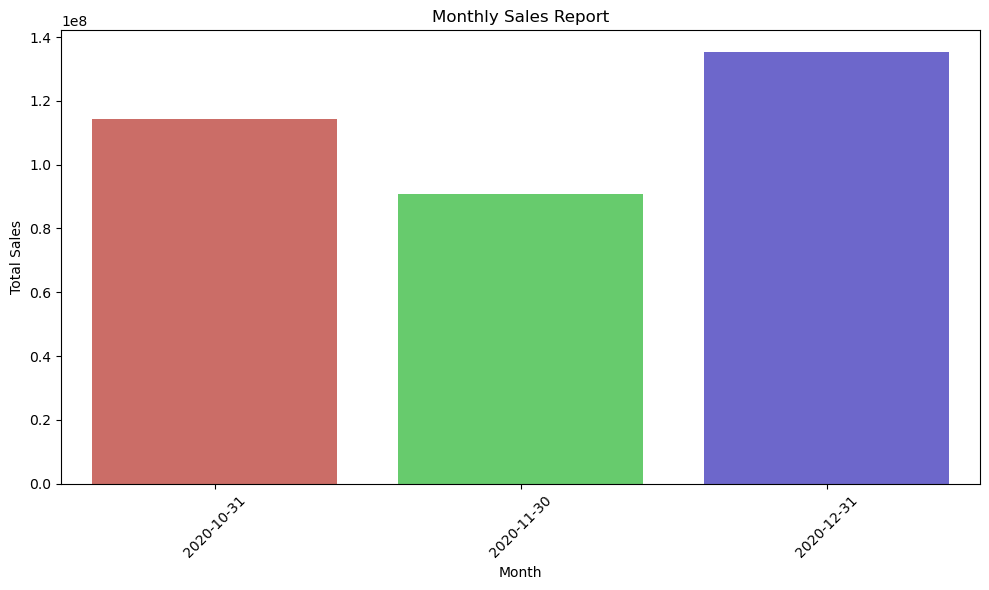

In [82]:
# Plot monthly report with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_report.index, y=monthly_report.values, palette='hls')
plt.title('Monthly Sales Report')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

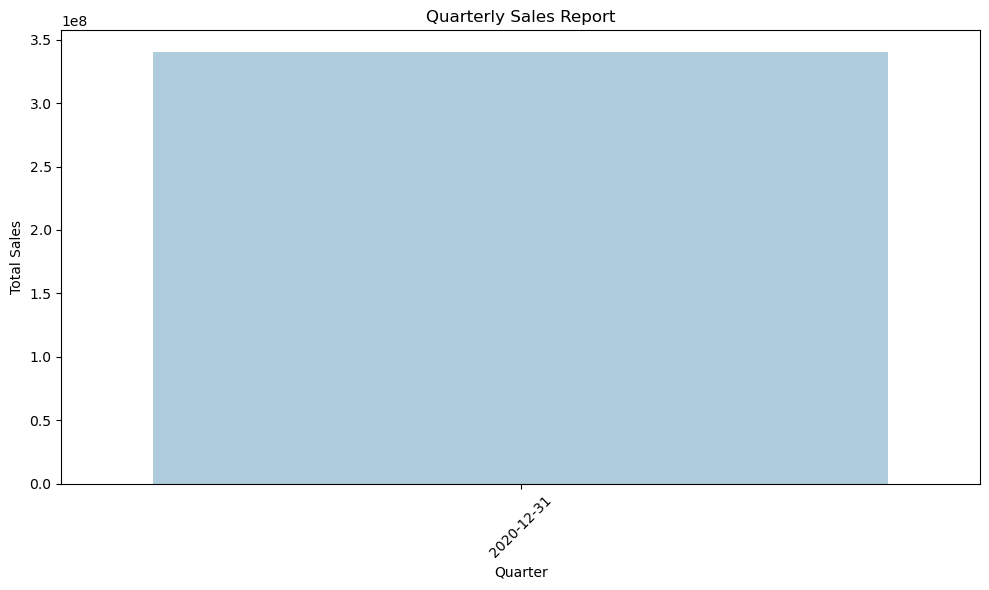

In [83]:
# Plot quarterly report with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_report.index, y=quarterly_report.values, palette='Paired')
plt.title('Quarterly Sales Report')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()